# Part 1.

## Data loading, pre-processing and representation.

In [3]:
#adding libraries
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import csv
import requests
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics

In [ ]:
#accessing the dataset file stored in the Google drive
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir("/content/gdrive/MyDrive/Colab Notebooks")
!ls

In [4]:
df = pd.read_csv("Student_performance_data.csv")#Reading the dataset file
print(df.dtypes)#Representing datatypes of the dataset columns

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass             int64
dtype: object


In [53]:
print(df["Gender"].value_counts())
print(df["Volunteering"].value_counts())
print(df["GradeClass"].value_counts())
print(df["Age"].value_counts())


Gender
1    1222
0    1170
Name: count, dtype: int64
Volunteering
0    2016
1     376
Name: count, dtype: int64
GradeClass
4    1211
3     414
2     391
1     269
0     107
Name: count, dtype: int64
Age
15    630
16    593
17    587
18    582
Name: count, dtype: int64


In [54]:
# Convert the 'Gender' column to numeric codes (e.g., Male=1, Female=0) for use in machine learning models
df["Gender"] = df["Gender"].astype("category").cat.codes
df["Volunteering"] = df["Volunteering"].astype("category").cat.codes

reduced_df = df[["GPA", "Age", "Volunteering", "Gender", "GradeClass","Age", "StudyTimeWeekly", "Absences"]]

# #Dataset data are displayed
print(reduced_df.describe())
print(reduced_df.info())
#Representing datatypes of the dataset columns
print(reduced_df.dtypes)

               GPA          Age  Volunteering       Gender   GradeClass  \
count  2392.000000  2392.000000   2392.000000  2392.000000  2392.000000   
mean      1.906186    16.468645      0.157191     0.510870     2.983696   
std       0.915156     1.123798      0.364057     0.499986     1.233908   
min       0.000000    15.000000      0.000000     0.000000     0.000000   
25%       1.174803    15.000000      0.000000     0.000000     2.000000   
50%       1.893393    16.000000      0.000000     1.000000     4.000000   
75%       2.622216    17.000000      0.000000     1.000000     4.000000   
max       4.000000    18.000000      1.000000     1.000000     4.000000   

               Age  StudyTimeWeekly     Absences  
count  2392.000000      2392.000000  2392.000000  
mean     16.468645         9.771992    14.541388  
std       1.123798         5.652774     8.467417  
min      15.000000         0.001057     0.000000  
25%      15.000000         5.043079     7.000000  
50%      16.000000

 ### DATA NORMALIZATION


In [55]:
df["GPA"] = (df["GPA"] - df["GPA"].min()) / (df["GPA"].max() - df["GPA"].min())
df["StudyTimeWeekly"] = (df["StudyTimeWeekly"] - df["StudyTimeWeekly"].min()) / (df["StudyTimeWeekly"].max() - df["StudyTimeWeekly"].min())
df["Absences"] = (df["Absences"] - df["Absences"].min()) / (df["Absences"].max() - df["Absences"].min())
df["Age"] = (df["Age"] - df["Age"].min()) / (df["Age"].max() - df["Age"].min())

print(df.head(10))
print(df.describe())


   StudentID       Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001  0.666667       1          0                  2         0.992773   
1       1002  1.000000       0          0                  1         0.771270   
2       1003  0.000000       0          2                  3         0.210718   
3       1004  0.666667       1          0                  3         0.501965   
4       1005  0.666667       1          0                  2         0.233840   
5       1006  1.000000       0          0                  1         0.409979   
6       1007  0.000000       0          1                  1         0.780928   
7       1008  0.000000       1          1                  4         0.772058   
8       1009  0.666667       0          0                  0         0.228310   
9       1010  0.333333       1          0                  1         0.923230   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0  0.241379         1             

### DATA VISUALISATION

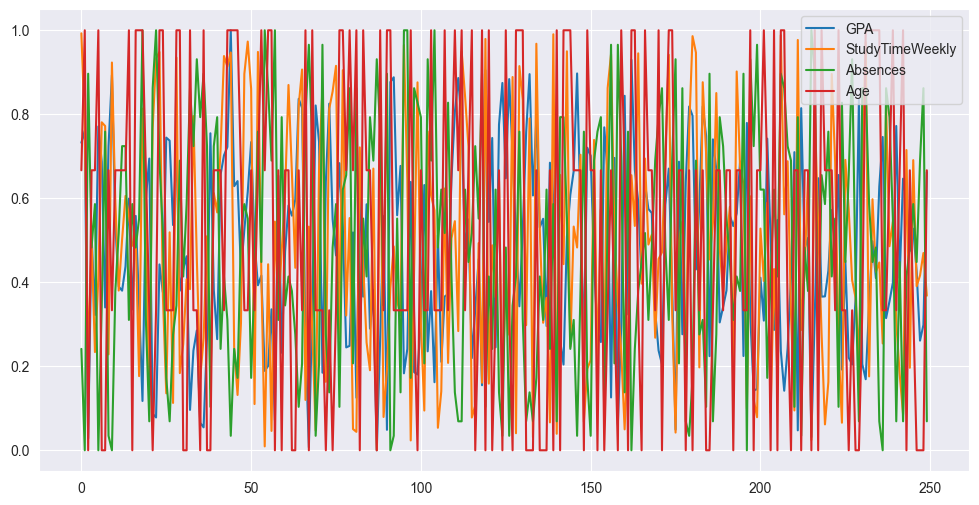

In [56]:


# Select numeric features
data_for_visualisation = df[["GPA",  "StudyTimeWeekly", "Absences", "Age"]]

# Limit data to first 300 rows for clarity (optional)
data_for_visualisation = data_for_visualisation.head(250)

# Line plot
data_for_visualisation.plot(figsize=(12, 6))
plt.show()


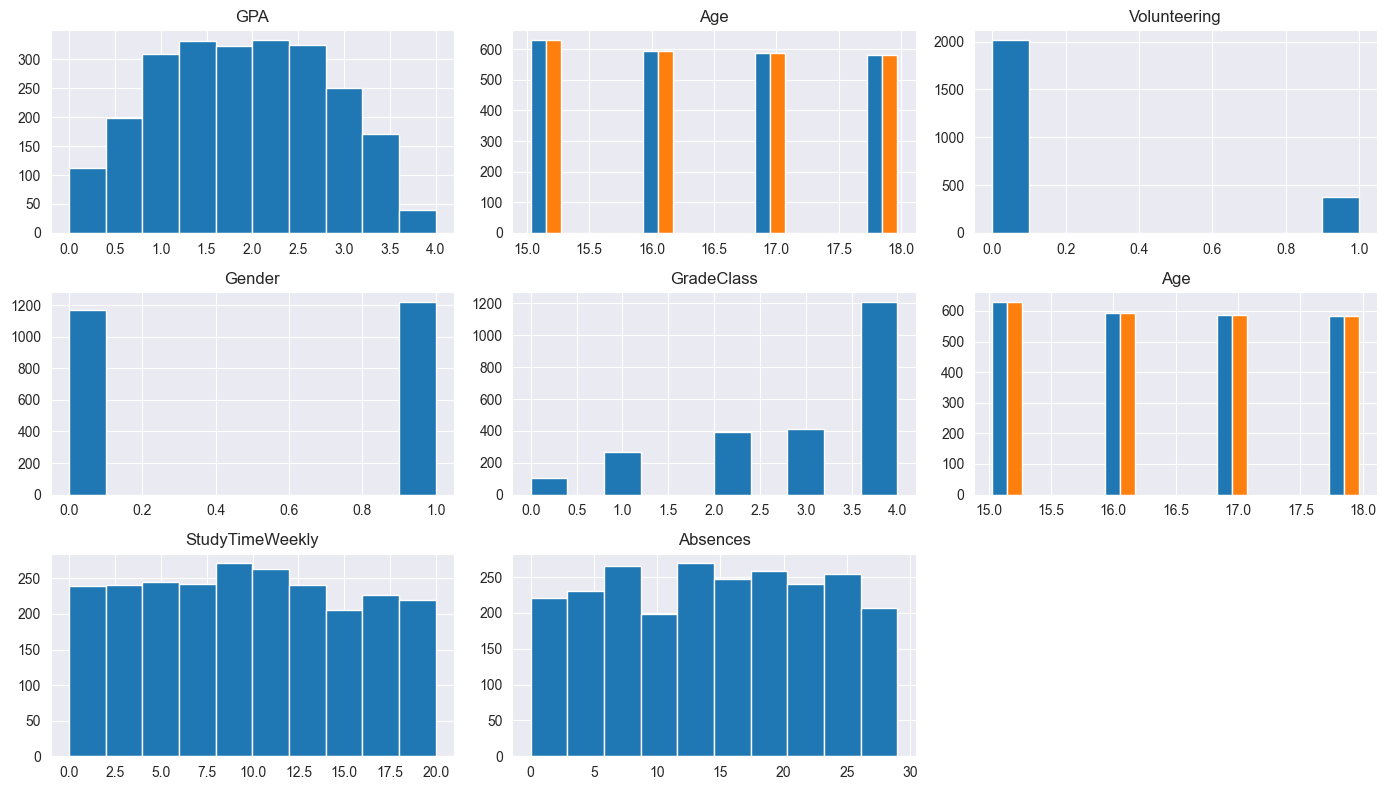

In [60]:
#Displaying histograms
reduced_df.hist(figsize=(14,8))
plt.tight_layout()
plt.show()

Text(0.5, 0.98, 'Feature Pairplot by GradeClass')

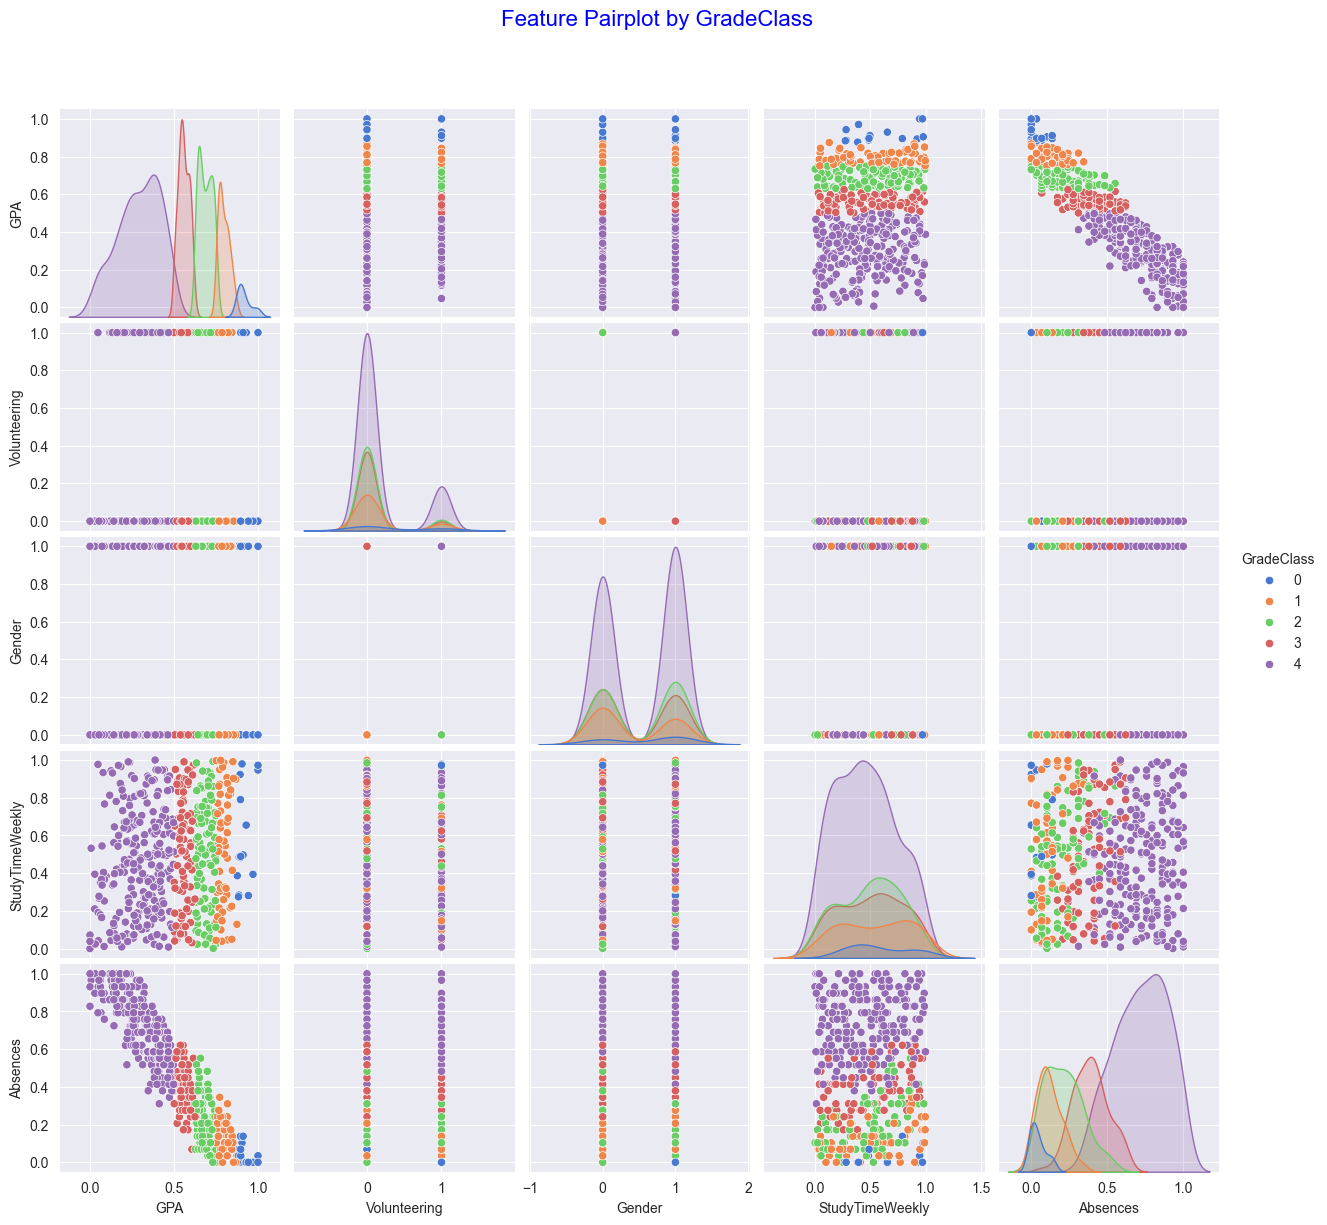

In [58]:
# Subset of selected features
pairplot_df = df[["GPA", "Volunteering", "Gender", "StudyTimeWeekly", "Absences", "GradeClass"]].dropna()

# Limit to first 500 samples for clearer visualization
pairplot_df = pairplot_df.head(500)

# Create pairplot with scatter plots and class coloring
plot = sns.pairplot(
    pairplot_df,
    hue="GradeClass",
    palette="muted",
    height=2.5,
    kind="scatter"
)

# Set plot title
#
plt.subplots_adjust(top=0.9)
plot.fig.suptitle("Feature Pairplot by GradeClass", fontsize=16, color='b')


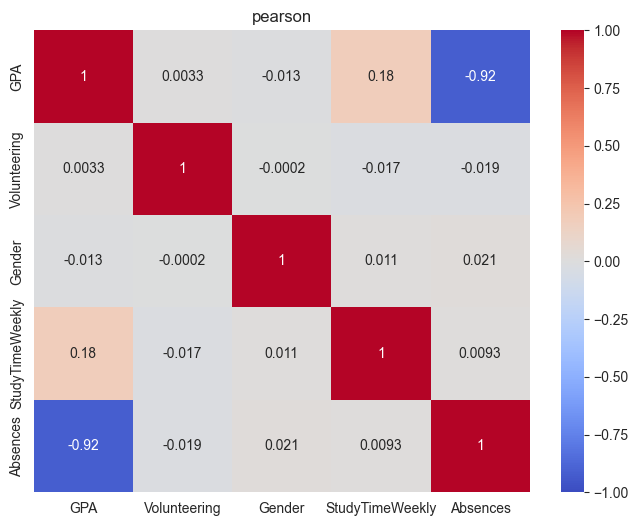

In [62]:
# Select numeric columns
numeric_features = df[["GPA", "Volunteering", "Gender", "StudyTimeWeekly", "Absences"]]
# Compute correlation matrix
correlation_matrix = numeric_features.corr(method='pearson')
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("pearson")
plt.show()


# Part 2.

### K-MEANS algorithm.

k = 2 --> Silhouette Score = 0.3898
k = 3 --> Silhouette Score = 0.3606
k = 4 --> Silhouette Score = 0.3635
k = 5 --> Silhouette Score = 0.3538
k = 6 --> Silhouette Score = 0.3356


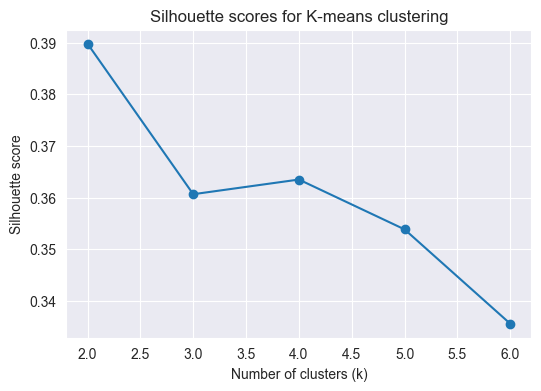

In [64]:
from sklearn.cluster import KMeans
from sklearn import metrics
# Feature selection for clustering
clustering_dataset = df[["GPA", "StudyTimeWeekly", "Absences"]].dropna()
# List to store silhouette scores
silhouette_scores = []
# Loop through k values from 2 to 6
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(clustering_dataset)
    score = metrics.silhouette_score(clustering_dataset, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"k = {k} --> Silhouette Score = {score:.4f}")

# Plotting silhouette scores
plt.figure(figsize=(6, 4))
plt.plot(range(2, 7), silhouette_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Silhouette scores for K-means clustering")
plt.grid(True)
plt.show()


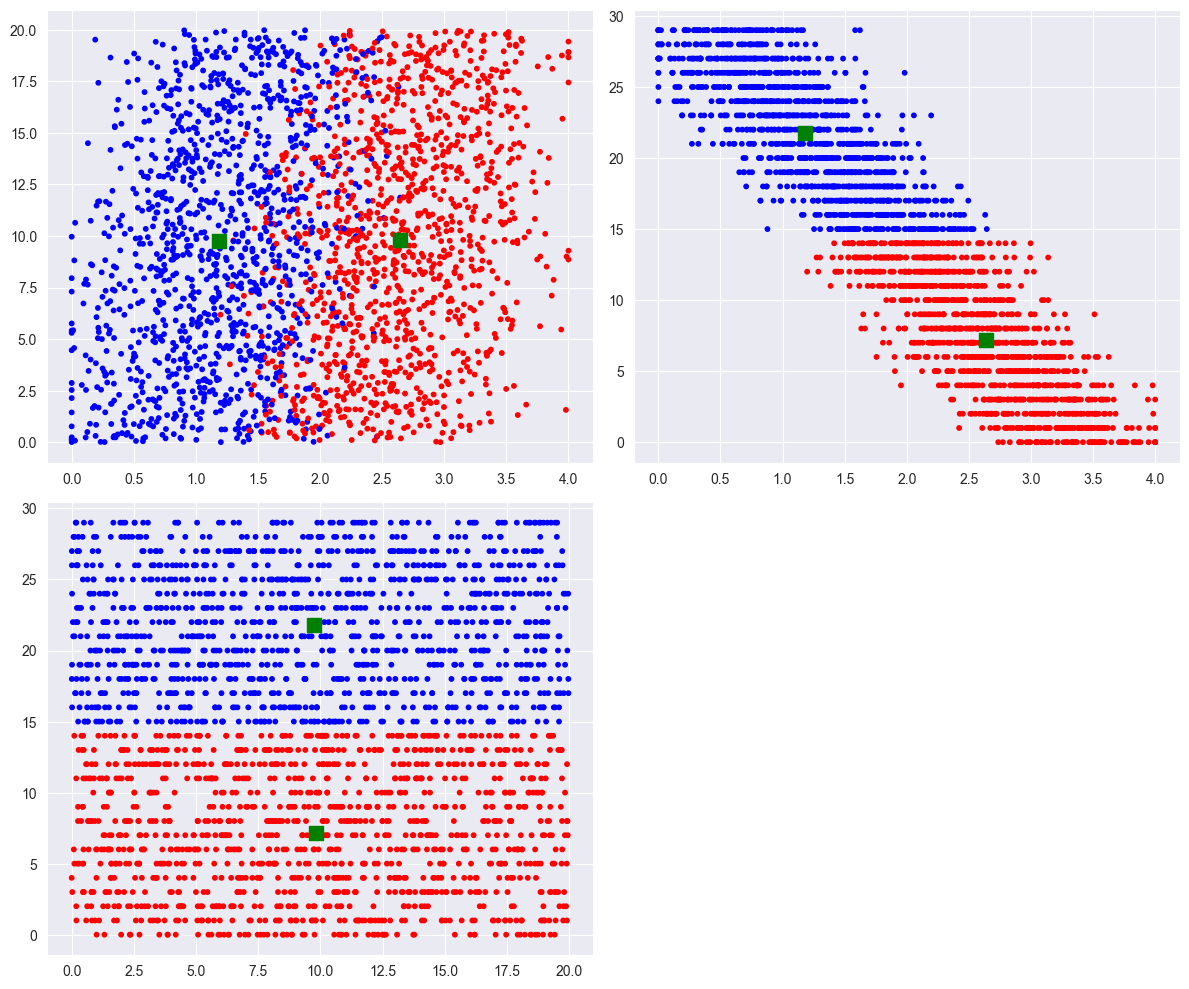

In [5]:

from sklearn.cluster import KMeans

# Use selected numeric features
clustering_dataset = df[["GPA", "StudyTimeWeekly", "Absences"]].dropna()

# Fit KMeans model
kmeans_model = KMeans(n_clusters=2, init="k-means++", random_state=42).fit(clustering_dataset)

# Cluster centers
centroids = kmeans_model.cluster_centers_

# Predicted labels
y_pred = kmeans_model.predict(clustering_dataset)


# manually define cluster colors
colors = ['red', 'blue']
cluster_colors = [colors[label] for label in y_pred]

# Plotting in 2x2 layout
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.scatter(clustering_dataset["GPA"], clustering_dataset["StudyTimeWeekly"], s=10, c=cluster_colors)
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='g', marker='s')

plt.subplot(2, 2, 2)
plt.scatter(clustering_dataset["GPA"], clustering_dataset["Absences"], s=10,c=cluster_colors)
plt.scatter(centroids[:, 0], centroids[:, 2], s=100, c='g', marker='s')

plt.subplot(2, 2, 3)
plt.scatter(clustering_dataset["StudyTimeWeekly"], clustering_dataset["Absences"], s=10, c=cluster_colors)
plt.scatter(centroids[:, 1], centroids[:, 2], s=100, c='g', marker='s')

plt.tight_layout()
plt.show()


In [85]:
from sklearn.cluster import AgglomerativeClustering

clustering_dataset = df[["GPA", "StudyTimeWeekly", "Absences"]].dropna()

clustering = AgglomerativeClustering().fit(clustering_dataset)



In [67]:


clustering_dataset = df[["GPA", "StudyTimeWeekly", "Absences"]].dropna()

model_2_clusters = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_2 = model_2_clusters.fit_predict(clustering_dataset)



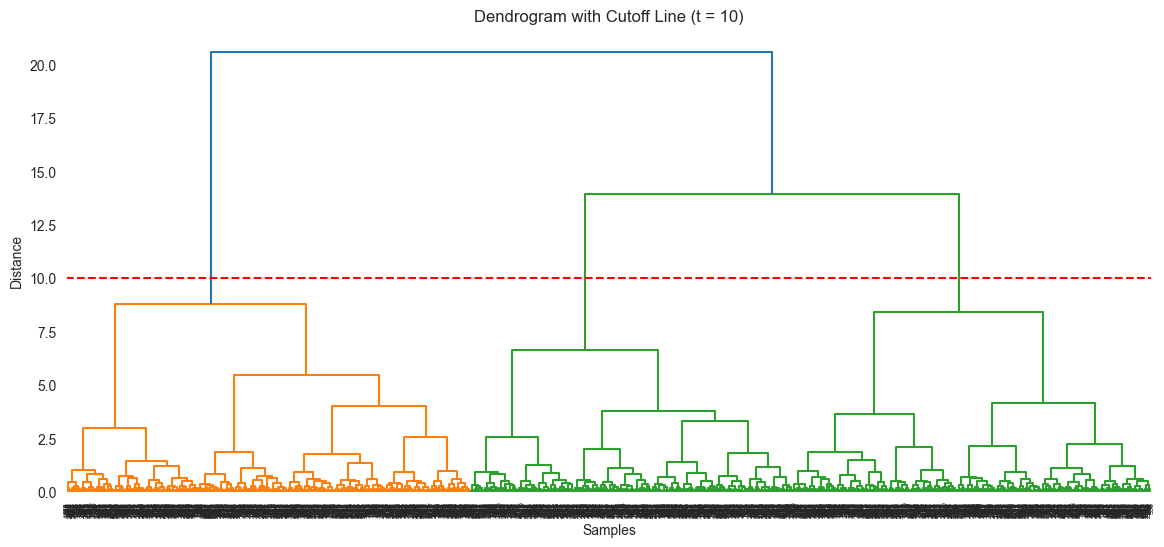

Cutoff t = 10 --> Number of clusters: 3


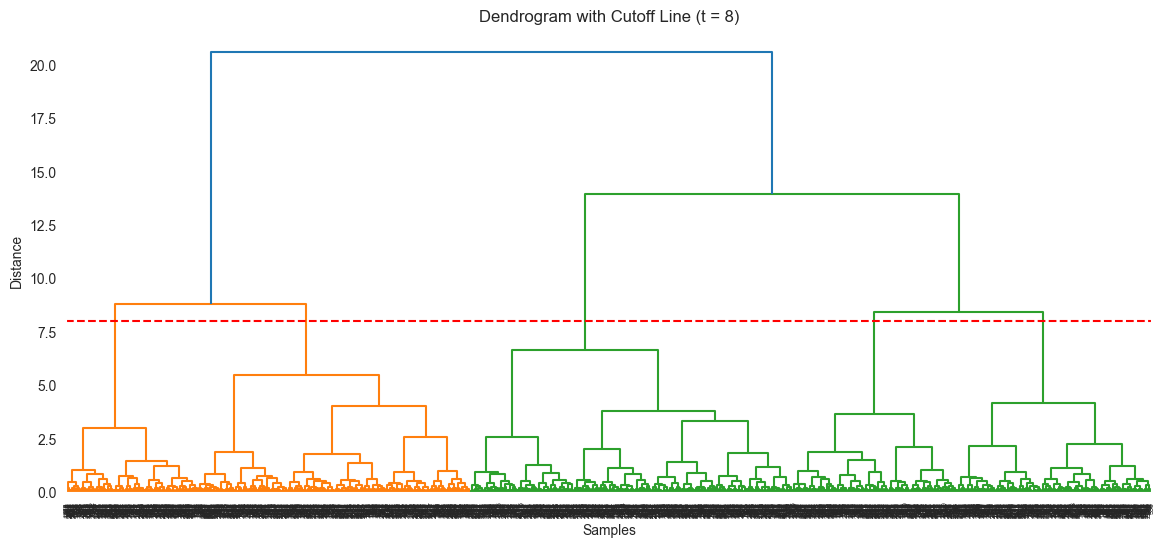

Cutoff t = 8 --> Number of clusters: 5


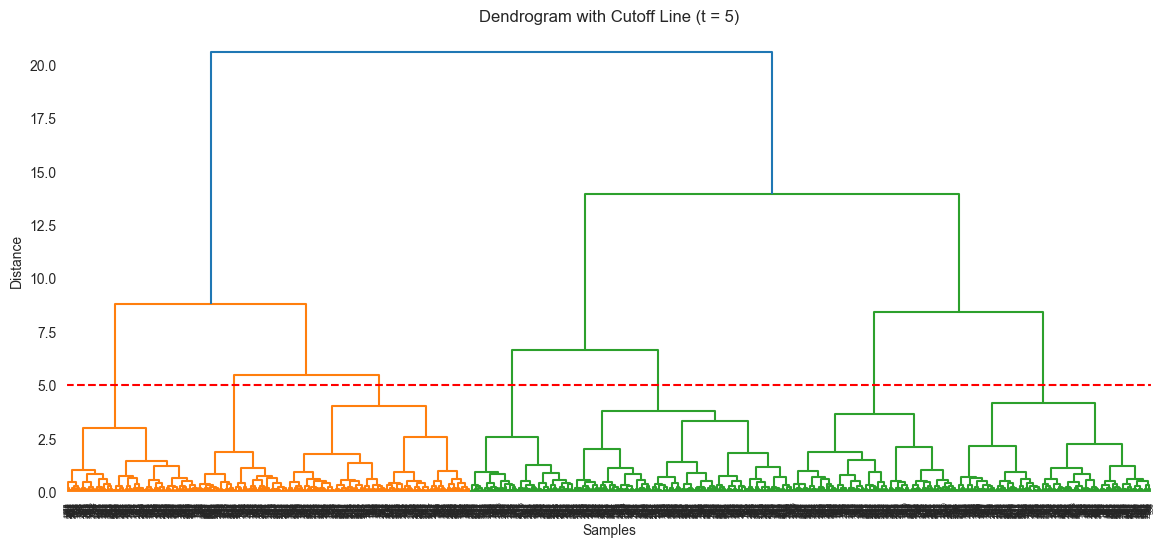

Cutoff t = 5 --> Number of clusters: 7


In [74]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import fcluster


# data selecting
clustering_dataset = df[["GPA", "StudyTimeWeekly", "Absences"]].dropna()

#
linkage_matrix = shc.linkage(clustering_dataset, method='ward')

# Cutoff levels
cutoffs = [10, 8, 5]

#
for t in cutoffs:
    plt.figure(figsize=(14, 6))
    shc.dendrogram(linkage_matrix)
    plt.axhline(y=t, color='r', linestyle='--')
    plt.title(f"Dendrogram with Cutoff Line (t = {t})")
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    plt.show()

    #
    labels = fcluster(linkage_matrix, t=t, criterion='distance')
    print(f"Cutoff t = {t} --> Number of clusters: {len(set(labels))}")


# Part 3.

### Artificial neural networks.

In [75]:
#importing a library for splitting the dataset into test and training dataset
from sklearn.model_selection import train_test_split
#saving the target values of the data objects, i.e. "grade classes", in a separate variable
targets = df['GradeClass']
#specifying the proportion of data objects that will form the training dataset (70%)
training_proportion = 0.7
#splitting the dataset into test and training sets using a random 70:30 split
X_train, X_test, y_train, y_test = train_test_split(clustering_dataset, targets, test_size=1.0 - training_proportion, random_state=42)

#### **Model 1** - 2 layers, 100 neurons in each.

In [76]:
#importing a library to work with artificial neural networks
from sklearn.neural_network import MLPClassifier
#building an artificial neural network model with 2 layers, each containing 100 neurons
#The following parameters are set: the maximum number of training iterations is 1000, the activation function is logistic,
#the weight matching method is stochastic gradient descent, the output of training iterations
my_ann_model = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000, activation = 'logistic', solver='sgd', learning_rate_init = 0.1, verbose = 1)
my_ann_model.fit(X_train, y_train)

Iteration 1, loss = 1.41497201
Iteration 2, loss = 1.33935623
Iteration 3, loss = 1.33071381
Iteration 4, loss = 1.33092027
Iteration 5, loss = 1.32611141
Iteration 6, loss = 1.32545620
Iteration 7, loss = 1.33305682
Iteration 8, loss = 1.32861110
Iteration 9, loss = 1.32311228
Iteration 10, loss = 1.31575660
Iteration 11, loss = 1.31653489
Iteration 12, loss = 1.30935885
Iteration 13, loss = 1.31182524
Iteration 14, loss = 1.29511287
Iteration 15, loss = 1.27589005
Iteration 16, loss = 1.25676307
Iteration 17, loss = 1.21639307
Iteration 18, loss = 1.16547416
Iteration 19, loss = 1.12428406
Iteration 20, loss = 1.03187694
Iteration 21, loss = 0.97996102
Iteration 22, loss = 0.93953853
Iteration 23, loss = 0.91387744
Iteration 24, loss = 0.90726786
Iteration 25, loss = 0.88986034
Iteration 26, loss = 0.87988218
Iteration 27, loss = 0.87501107
Iteration 28, loss = 0.86772299
Iteration 29, loss = 0.86734796
Iteration 30, loss = 0.86181027
Iteration 31, loss = 0.85674491
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              learning_rate_init=0.1, max_iter=1000, solver='sgd', verbose=1)

              precision    recall  f1-score   support

           0       0.83      0.61      0.70        33
           1       0.91      0.84      0.87        80
           2       0.91      0.90      0.90       121
           3       0.90      0.83      0.87       127
           4       0.92      0.99      0.95       357

    accuracy                           0.91       718
   macro avg       0.89      0.83      0.86       718
weighted avg       0.91      0.91      0.91       718



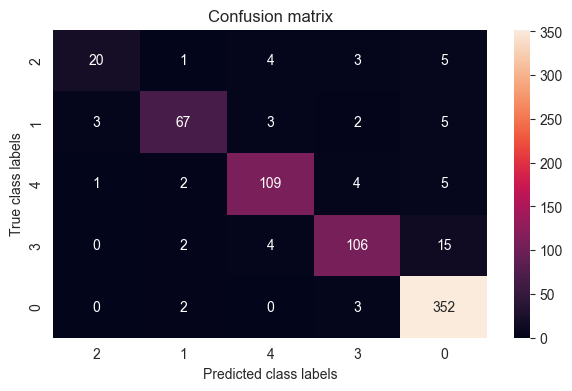

In [77]:
#importing libraries for acquiring and representing performance metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pltb
#we use the trained model with a test set to obtain predictions
y_predictions = my_ann_model.predict(X_test)
#displaying metrics
print(classification_report(y_test,y_predictions, zero_division=0))
#creating a confusion matrix
my_confusion_matrix = confusion_matrix(y_test, y_predictions)
#displaying the confusion matrix
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(my_confusion_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(df['GradeClass'].unique());
ax.yaxis.set_ticklabels(df['GradeClass'].unique());

#### *Model 2* - 1 layer, 5 neurons

In [78]:
#building an artificial neural network model with 1 layer and 5 neurons in it
#The following parameters are set: the maximum number of training iterations is 50, the activation function is logistic,
#the weight matching method is stochastic gradient descent, the output of training iterations
my_ann_model_2 = MLPClassifier(hidden_layer_sizes=(5), max_iter=50, activation = 'logistic', solver='sgd', learning_rate_init = 0.2, verbose = 0)
my_ann_model_2.fit(X_train, y_train)

C:\Users\Hp\PycharmProjects\machine-learning-assignment-python\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=5,
              learning_rate_init=0.2, max_iter=50, solver='sgd', verbose=0)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.59      0.60      0.59        80
           2       0.66      0.64      0.65       121
           3       0.68      0.72      0.70       127
           4       0.89      0.96      0.92       357

    accuracy                           0.78       718
   macro avg       0.56      0.58      0.57       718
weighted avg       0.74      0.78      0.76       718



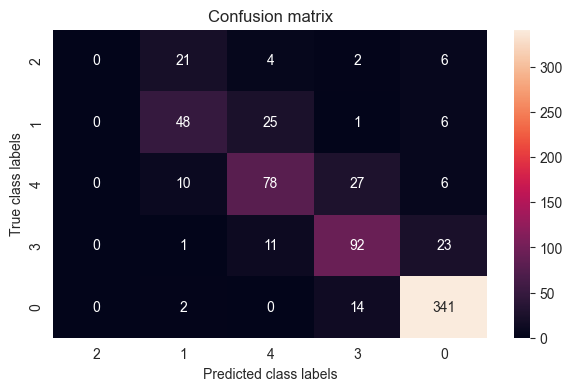

In [79]:
#we use the trained model with a test set to obtain predictions
y_predictions_2 = my_ann_model_2.predict(X_test)
#displaying metrics
print(classification_report(y_test,y_predictions_2, zero_division=0))
#creating a confusion matrix
my_confusion_matrix = confusion_matrix(y_test, y_predictions_2)
#displaying the confusion matrix
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(my_confusion_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(df['GradeClass'].unique());
ax.yaxis.set_ticklabels(df['GradeClass'].unique());

### kNN algoritms.

In [80]:
#importing a library to use the algorithm
from sklearn.neighbors import KNeighborsClassifier
#a model with 5 neighbours is created
KNN_MODEL = KNeighborsClassifier(n_neighbors=5)
#Feed the training dataset to the model
KNN_MODEL.fit(X_train, y_train)
#we use the trained model with a test set to obtain predictions
y_predictions_knn = KNN_MODEL.predict(X_test)

              precision    recall  f1-score   support

           0       0.82      0.42      0.56        33
           1       0.75      0.76      0.76        80
           2       0.78      0.78      0.78       121
           3       0.80      0.77      0.78       127
           4       0.92      0.97      0.94       357

    accuracy                           0.85       718
   macro avg       0.81      0.74      0.76       718
weighted avg       0.85      0.85      0.85       718



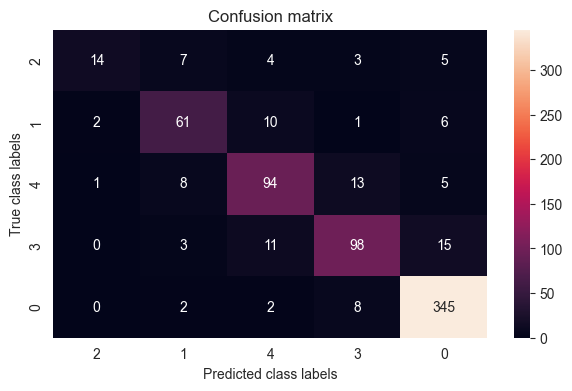

In [82]:
#importing libraries for acquiring and representing performance metrics
from sklearn.metrics import classification_report, confusion_matrix
#displaying metrics
print(classification_report(y_test,y_predictions_knn, zero_division=0))
#creating a confusion matrix
my_confusion_matrix = confusion_matrix(y_test, y_predictions_knn)
#displaying the confusion matrix
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(my_confusion_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(df['GradeClass'].unique());
ax.yaxis.set_ticklabels(df['GradeClass'].unique());